In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [6]:
digits = load_digits()
target = digits.target
data = digits.data

In [18]:
def answer(clf):
    ans = cross_val_score(clf, data, target, cv = 10, n_jobs = -1).mean()
    with open("bagging_answer.txt", "w") as fout:
        fout.write(str(ans))

In [21]:
tree = DecisionTreeClassifier()
answer(clf)

In [22]:
clf = BaggingClassifier(tree, n_estimators = 100)
answer(clf)

In [23]:
clf = BaggingClassifier(tree, n_estimators = 100, max_features = int(np.sqrt(data.shape[1])))
answer(clf)

In [24]:
tree = DecisionTreeClassifier(max_features = int(np.sqrt(data.shape[1])))
clf = BaggingClassifier(tree, n_estimators = 100)
answer(clf)

In [26]:
clf_base = RandomForestClassifier(n_estimators = 100, max_depth = 5, max_features = 1.0)
cross_val_score(clf, data, target, cv = 10, n_jobs = -1).mean()

0.94768156424581

In [27]:
clf_base = RandomForestClassifier(n_estimators = 120, max_depth = 10, max_features = int(np.sqrt(data.shape[1])))
cross_val_score(clf, data, target, cv = 10, n_jobs = -1).mean()

0.9493513345747981

In [29]:
clf_base = RandomForestClassifier(n_estimators = 150, max_depth = 10, max_features = int(np.sqrt(data.shape[1])))
cross_val_score(clf, data, target, cv = 10, n_jobs = -1).mean()

0.9504593420235878

In [42]:
def plot_dep(estim, depth, feature):
    scoring = []
    n_estimators_grid = [5, 10, 25, 50, 75, 100, 150, 200, 250]
    max_depth_grid = [2, 5, 10, 15, 20]
    max_features_grid = [2, 8, 16, 20, 34, 60, 80]
    if estim == 1:
        x = n_estimators_grid
        for n_estimators in n_estimators_grid: 
            clf = RandomForestClassifier(n_estimators = n_estimators, n_jobs = -1)
            scoring.append(cross_val_score(clf, data, target, cv = 10, n_jobs = -1))
    elif depth == 1:
        x = max_depth_grid
        for max_depth in max_depth_grid: 
            clf = RandomForestClassifier(max_depth = max_depth, n_jobs = -1)
            scoring.append(cross_val_score(clf, data, target, cv = 10, n_jobs = -1))
    else:
        x = max_features_grid
        for max_features in max_features_grid: 
            clf = RandomForestClassifier(max_features = max_features, n_jobs = -1)
            scoring.append(cross_val_score(clf, data, target, cv = 10, n_jobs = -1))
    scoring = np.asmatrix(scoring)
    
    plt.plot(x, scoring.mean(axis = 1), marker = '.')
    plt.grid(True)
    plt.show()

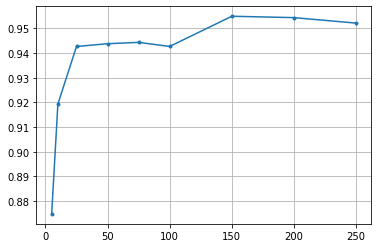

In [43]:
plot_dep(1, 0, 0)

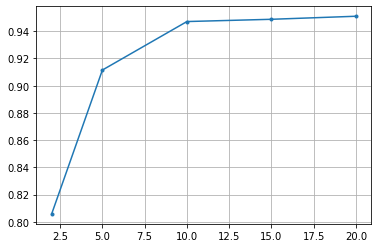

In [44]:
plot_dep(0, 1, 0)

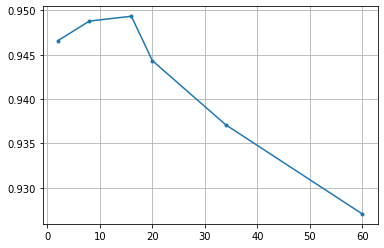

In [45]:
plot_dep(0, 0, 1)